# Explore here

In [1]:
import os
from PIL import Image  # Asegúrate de tener instalada la librería Pillow: pip install Pillow

def contar_imagenes_en_carpeta(ruta_carpeta):
    # Lista todos los archivos en la carpeta
    archivos = os.listdir(ruta_carpeta)

    # Filtra solo los archivos con extensiones de imágenes comunes
    extensiones_permitidas = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    imagenes = [archivo for archivo in archivos if any(archivo.lower().endswith(ext) for ext in extensiones_permitidas)]

    # Retorna la cantidad de imágenes encontradas
    return len(imagenes)

# Ruta de la carpeta que contiene las imágenes (cámbiala según tu caso)
carpeta_imagenes = "../data/raw/train"

# Llamada a la función para contar las imágenes
cantidad_imagenes = contar_imagenes_en_carpeta(carpeta_imagenes)

# Imprimir el resultado
print(f"La carpeta '{carpeta_imagenes}' contiene {cantidad_imagenes} imágenes.")


La carpeta '../data/raw/train' contiene 25000 imágenes.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-01-07 16:14:54.248724: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 16:14:57.536677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 16:14:57.536796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 16:14:57.955253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 16:14:58.992113: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 16:14:58.994180: I tensorflow/core/platform/cpu_feature_guard.cc:1

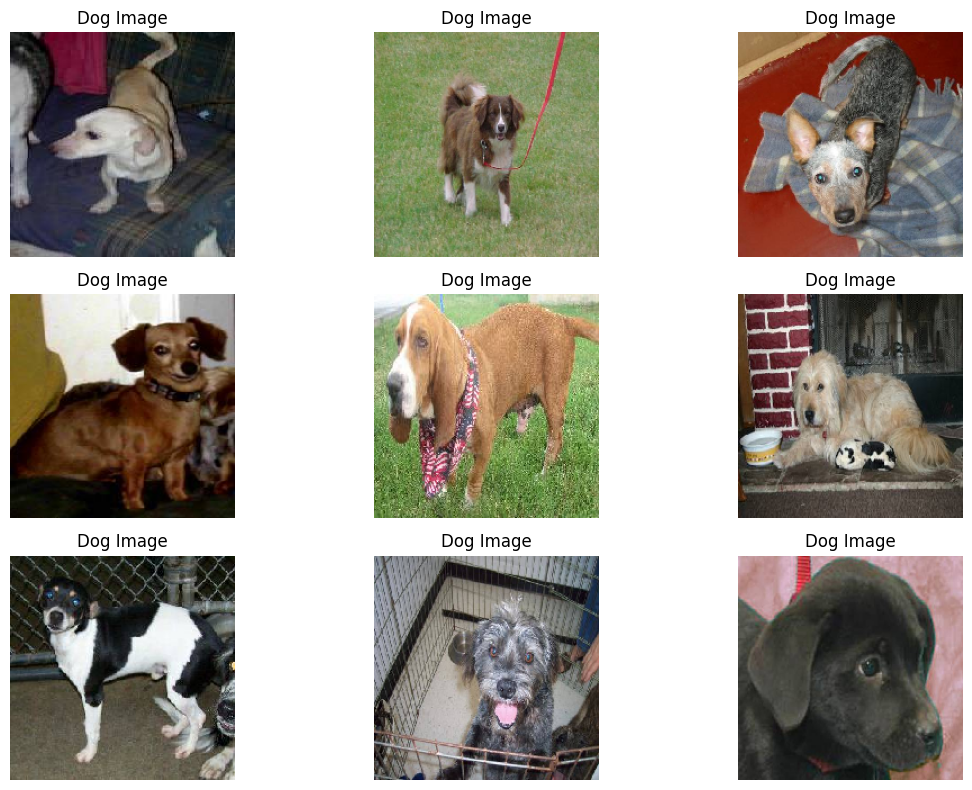

In [3]:
# Importar y mostrar las primeras 9 imágenes de perros

from PIL import Image
import matplotlib.pyplot as plt
import os

# Ruta al directorio que contiene tus datos de imágenes de perros y gatos
data_dir = "../data/raw/train"

# Obtener una lista de todos los nombres de archivos de imágenes de perros y gatos
all_image_files = os.listdir(data_dir)

# Filtrar solo los archivos de imágenes que contienen la palabra "dog"
dog_image_files = [archivo for archivo in all_image_files if "dog" in archivo.lower()]

# Cargar las primeras nueve imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(data_dir, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200))  # Ajusta target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalizar los valores de píxeles a [0, 1]
    dog_images.append(img_array)

# Crear una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()


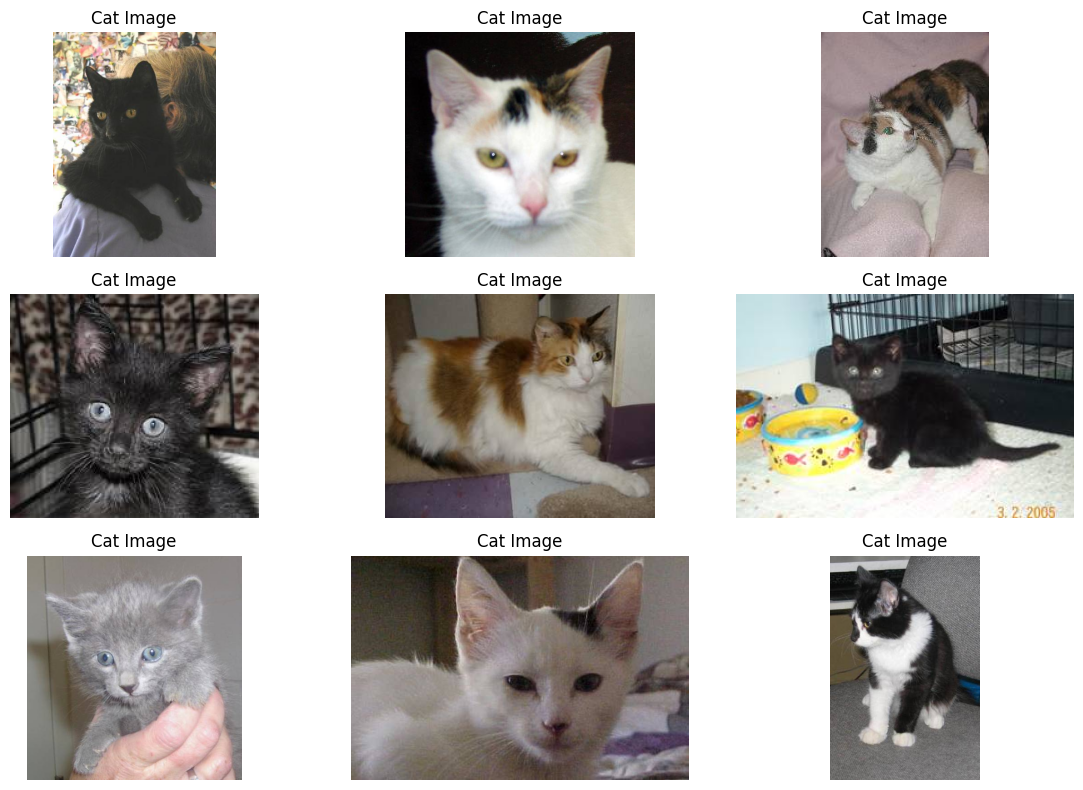

In [4]:
cats_image_files = [archivo for archivo in all_image_files if "cat" in archivo.lower()]

# Cargar las primeras nueve imágenes de perros
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(data_dir, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

creamos un objeto para datos de train y test

In [5]:
# import os
# import shutil

# # Directorio actual
# train_dir = "../data/raw/train"
# dog_dir = "../data/raw/dog"  # Directorio de destino para las imágenes que contienen "dog"

# # Crear la carpeta "dog" si no existe
# if not os.path.exists(dog_dir):
#     os.makedirs(dog_dir)

# # Obtener una lista de todos los archivos en el directorio de entrenamiento
# all_files = os.listdir(train_dir)

# # Filtrar los archivos que contienen la palabra "dog"
# dog_files = [file for file in all_files if "dog" in file.lower()]

# # Copiar los archivos a la carpeta "dog"
# for dog_file in dog_files:
#     src_path = os.path.join(train_dir, dog_file)
#     dest_path = os.path.join(dog_dir, dog_file)
#     shutil.copy2(src_path, dest_path)

# print(f"Se han copiado {len(dog_files)} archivos a la carpeta 'dog'.")


In [6]:
# import os
# import shutil

# # Directorio actual
# train_dir = "../data/raw/train"
# cat_dir = "../data/raw/cat"  # Directorio de destino para las imágenes que contienen "cat"

# # Crear la carpeta "cat" si no existe
# if not os.path.exists(cat_dir):
#     os.makedirs(cat_dir)

# # Obtener una lista de todos los archivos en el directorio de entrenamiento
# all_files = os.listdir(train_dir)

# # Filtrar los archivos que contienen la palabra "cat"
# cat_files = [file for file in all_files if "cat" in file.lower()]

# # Copiar los archivos a la carpeta "cat"
# for cat_file in cat_files:
#     src_path = os.path.join(train_dir, cat_file)
#     dest_path = os.path.join(cat_dir, cat_file)
#     shutil.copy2(src_path, dest_path)

# print(f"Se han copiado {len(cat_files)} archivos a la carpeta 'cat'.")


In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw/train"
test_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)
# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


entrenamos el modelo

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

2024-01-07 16:15:15.491151: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-01-07 16:15:16.447045: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-01-07 16:15:16.714949: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-01-07 16:15:17.096226: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-01-07 16:15:17.206743: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


In [9]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

# # Define your neural network model
model = Sequential()
model.add(Flatten(input_shape=(200, 200, 3)))  # Assuming input shape is 200x200 pixels with 3 channels (RGB)
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Assuming 2 output classes (dog and cat)

# # Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])



# # Train the model
model.fit(train_data, epochs=1)


782/782 [==============================] - 112s 142ms/step - loss: 284.4748 - accuracy: 0.5330


In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Definir el modelo y compilarlo (asegúrate de haber definido 'model' antes de esta sección)

# Definir callbacks
checkpoint = ModelCheckpoint("../models/model1.h5", 
                             monitor="val_accuracy", 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode="auto")
early = EarlyStopping(monitor="val_accuracy", 
                      patience=3, 
                      verbose=1, 
                      mode="auto")

# Entrenar el modelo con callbacks
hist = model.fit(train_data, 
                    steps_per_epoch=100, 
                    validation_data=test_data, 
                    validation_steps=10, 
                    epochs=3, 
                    callbacks=[checkpoint, early])


Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 29.2685 - accuracy: 0.5944
Epoch 1: val_accuracy improved from -inf to 0.12812, saving model to ../models/model1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 17s 169ms/step - loss: 29.2685 - accuracy: 0.5944 - val_loss: 71.1308 - val_accuracy: 0.1281
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 37.0519 - accuracy: 0.5806
Epoch 2: val_accuracy improved from 0.12812 to 0.87500, saving model to ../models/model1.h5
100/100 [==============================] - 16s 161ms/step - loss: 37.0519 - accuracy: 0.5806 - val_loss: 85.3165 - val_accuracy: 0.8750
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 44.8436 - accuracy: 0.5669
Epoch 3: val_accuracy did not improve from 0.87500
100/100 [==============================] - 19s 191ms/step - loss: 44.8436 - accuracy: 0.5669 - val_loss: 86.8205 - val_accuracy: 0.1031



Los resultados del entrenamiento muestran que la precisión en el conjunto de validación (val_accuracy) mejoró en la primera época, pero no en las siguientes dos épocas. También es notable que la pérdida en el conjunto de validación (val_loss) aumentó.

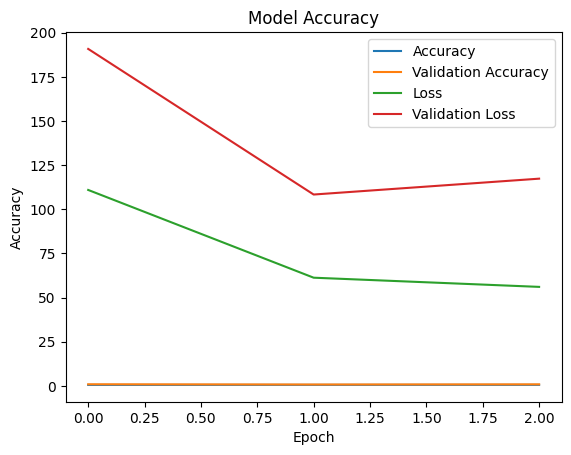

In [15]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 0s 102ms/step
cat


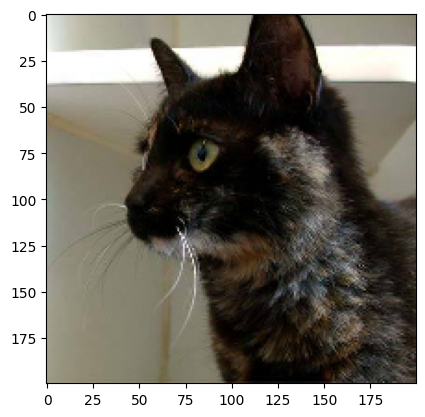

In [24]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = image.load_img("../data/raw/test/5.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# Cargar el modelo previamente entrenado
saved_model = load_model("../models/model1.h5")

# Preprocesar la imagen de la misma manera que durante el entrenamiento
img = img / 255.0  # Normalizar los píxeles
img = img.reshape((-1, 200, 200, 3))  # Ajustar la forma (número de muestras, altura, ancho, canales)

# Realizar la predicción
output = saved_model.predict(img)

# Determinar la clase predicha
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")
